### Import Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the NOAA dataset

In [20]:
noaa_df=pd.read_csv("..\data_raw\StormEvents_details-ftp_v1.0_d2024_c20251204.csv")

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\mahit\AppData\Local\Temp\ipykernel_34572\3450461398.py:1: SyntaxWarning: invalid escape sequence '\d'
  noaa_df=pd.read_csv("..\data_raw\StormEvents_details-ftp_v1.0_d2024_c20251204.csv")


In [21]:
noaa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69679 entries, 0 to 69678
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BEGIN_YEARMONTH     69679 non-null  int64  
 1   BEGIN_DAY           69679 non-null  int64  
 2   BEGIN_TIME          69679 non-null  int64  
 3   END_YEARMONTH       69679 non-null  int64  
 4   END_DAY             69679 non-null  int64  
 5   END_TIME            69679 non-null  int64  
 6   EPISODE_ID          69679 non-null  int64  
 7   EVENT_ID            69679 non-null  int64  
 8   STATE               69679 non-null  object 
 9   STATE_FIPS          69679 non-null  int64  
 10  YEAR                69679 non-null  int64  
 11  MONTH_NAME          69679 non-null  object 
 12  EVENT_TYPE          69679 non-null  object 
 13  CZ_TYPE             69679 non-null  object 
 14  CZ_FIPS             69679 non-null  int64  
 15  CZ_NAME             69679 non-null  object 
 16  WFO 

In [22]:
noaa_df.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,202404,30,2033,202404,30,2033,189851,1174463,OKLAHOMA,40,...,0.0,SSW,FREDERICK ARPT,34.3444,-98.983,34.3444,-98.983,A rather nebulous upper air pattern existed ac...,Frederick Municipal Airport (KFDR) observation.,CSV
1,202407,1,0,202407,5,900,193486,1195301,LOUISIANA,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,An upper ridge of high pressure built in acros...,NaN,CSV
2,202411,16,230,202411,18,1421,197838,1223377,OREGON,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A series of cold fronts the weekend of Nov. 16...,The Hog Pass SNOTEL reported an estimated 12 i...,CSV
3,202405,22,1230,202405,22,1615,191723,1184135,TEXAS,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong upper-level subtropical ridge/heat do...,Harlingen Valley International Airport (KHRL) ...,CSV
4,202405,21,1200,202405,21,1530,191723,1184133,TEXAS,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong upper-level subtropical ridge/heat do...,"By proxy, between locations in northern Kenedy...",CSV


In [23]:
columns_to_keep = [
    'EVENT_ID',
    'EPISODE_ID',
    'STATE',
    'YEAR',
    'EVENT_TYPE',
    'CZ_TYPE',
    'CZ_NAME',
    'BEGIN_DATE_TIME',
    'END_DATE_TIME',
    'INJURIES_DIRECT',
    'INJURIES_INDIRECT',
    'DEATHS_DIRECT',
    'DEATHS_INDIRECT',
    'DAMAGE_PROPERTY',
    'DAMAGE_CROPS'
]

noaa_clean = noaa_df[columns_to_keep].copy()


In [24]:
noaa_clean.head()

,EVENT_ID,EPISODE_ID,STATE,YEAR,EVENT_TYPE,CZ_TYPE,CZ_NAME,BEGIN_DATE_TIME,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS
0,1174463,189851,OKLAHOMA,2024,Thunderstorm Wind,C,TILLMAN,30-APR-24 20:33:00,30-APR-24 20:33:00,0,0,0,0,NaN,NaN
1,1195301,193486,LOUISIANA,2024,Excessive Heat,Z,NATCHITOCHES,01-JUL-24 00:00:00,05-JUL-24 09:00:00,0,0,0,0,0.00K,0.00K
2,1223377,197838,OREGON,2024,Heavy Snow,Z,EAST SLOPES OF THE OREGON CASCADES,16-NOV-24 02:30:00,18-NOV-24 14:21:00,0,0,0,0,0.00K,0.00K
3,1184135,191723,TEXAS,2024,Heat,Z,WILLACY,22-MAY-24 12:30:00,22-MAY-24 16:15:00,0,0,0,0,0.00K,0.00K
4,1184133,191723,TEXAS,2024,Heat,Z,WILLACY,21-MAY-24 12:00:00,21-MAY-24 15:30:00,0,0,0,0,0.00K,0.00K


In [25]:
noaa_df.describe()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE_FIPS,YEAR,...,CATEGORY,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_FIPS,BEGIN_RANGE,END_RANGE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON
count,69679.00000,69679.000000,69679.000000,69679.00000,69679.000000,69679.000000,69679.000000,6.967900e+04,69679.000000,69679.0,...,76.000000,2137.000000,2137.000000,351.000000,42190.000000,42190.000000,42190.000000,42190.000000,42190.000000,42190.000000
mean,202405.75789,15.225735,1260.384879,202405.75789,16.720016,1469.647943,192408.501170,1.188036e+06,33.466453,2024.0,...,1.473684,3.709743,211.894244,102.911681,2.419365,2.438066,37.481650,-89.956326,37.482183,-89.950714
std,2.96773,9.073193,661.172968,2.96773,8.988269,614.179263,3134.692731,2.237487e+04,19.678179,0.0,...,0.774144,4.613856,299.965460,77.965895,4.094632,4.155062,5.336694,11.687335,5.336323,11.686974
min,202401.00000,1.000000,0.000000,202401.00000,1.000000,0.000000,186811.000000,1.146596e+06,1.000000,2024.0,...,1.000000,0.010000,1.000000,1.000000,0.000000,0.000000,-14.344900,-170.829000,-14.340500,-170.825000
25%,202404.00000,8.000000,800.000000,202404.00000,9.000000,1100.000000,189849.000000,1.169198e+06,19.000000,2024.0,...,1.000000,0.690000,50.000000,49.000000,1.000000,1.000000,34.130000,-97.010000,34.132925,-97.001500
50%,202406.00000,15.000000,1414.000000,202406.00000,16.000000,1623.000000,192223.000000,1.188063e+06,32.000000,2024.0,...,1.000000,2.110000,100.000000,91.000000,1.000000,1.000000,38.000000,-89.650000,38.000000,-89.640000
75%,202408.00000,24.000000,1757.000000,202408.00000,25.000000,1901.000000,194927.500000,1.206692e+06,47.000000,2024.0,...,2.000000,5.000000,250.000000,137.000000,3.000000,3.000000,41.246850,-81.430000,41.250000,-81.430000
max,202412.00000,31.000000,2359.000000,202412.00000,31.000000,2359.000000,207334.000000,1.293409e+06,99.000000,2024.0,...,4.000000,49.960000,3200.000000,510.000000,172.000000,172.000000,70.367900,171.468900,70.278900,171.468900


In [26]:
date_cols = ['BEGIN_DATE_TIME', 'END_DATE_TIME']
for col in date_cols:
    noaa_clean[col] = pd.to_datetime(noaa_clean[col], errors='coerce')


C:\Users\mahit\AppData\Local\Temp\ipykernel_34572\3294433499.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  noaa_clean[col] = pd.to_datetime(noaa_clean[col], errors='coerce')
C:\Users\mahit\AppData\Local\Temp\ipykernel_34572\3294433499.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  noaa_clean[col] = pd.to_datetime(noaa_clean[col], errors='coerce')


In [27]:
noaa_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69679 entries, 0 to 69678
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   EVENT_ID           69679 non-null  int64         
 1   EPISODE_ID         69679 non-null  int64         
 2   STATE              69679 non-null  object        
 3   YEAR               69679 non-null  int64         
 4   EVENT_TYPE         69679 non-null  object        
 5   CZ_TYPE            69679 non-null  object        
 6   CZ_NAME            69679 non-null  object        
 7   BEGIN_DATE_TIME    69679 non-null  datetime64[ns]
 8   END_DATE_TIME      69679 non-null  datetime64[ns]
 9   INJURIES_DIRECT    69679 non-null  int64         
 10  INJURIES_INDIRECT  69679 non-null  int64         
 11  DEATHS_DIRECT      69679 non-null  int64         
 12  DEATHS_INDIRECT    69679 non-null  int64         
 13  DAMAGE_PROPERTY    54633 non-null  object        
 14  DAMAGE

In [28]:
noaa_clean.reset_index(drop=True, inplace=True)

In [29]:
noaa_clean.isnull().sum()


EVENT_ID                 0
EPISODE_ID               0
STATE                    0
YEAR                     0
EVENT_TYPE               0
CZ_TYPE                  0
CZ_NAME                  0
BEGIN_DATE_TIME          0
END_DATE_TIME            0
INJURIES_DIRECT          0
INJURIES_INDIRECT        0
DEATHS_DIRECT            0
DEATHS_INDIRECT          0
DAMAGE_PROPERTY      15046
DAMAGE_CROPS         15413
dtype: int64

In [30]:
noaa_clean.describe()

,EVENT_ID,EPISODE_ID,YEAR,BEGIN_DATE_TIME,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT
count,6.967900e+04,69679.000000,69679.0,69679,69679,69679.000000,69679.000000,69679.000000,69679.000000
mean,1.188036e+06,192408.501170,2024.0,2024-06-08 08:33:34.573687808,2024-06-09 22:31:59.234489856,0.020408,0.005999,0.010118,0.004492
min,1.146596e+06,186811.000000,2024.0,2024-01-01 00:00:00,2024-01-01 05:50:00,0.000000,0.000000,0.000000,0.000000
25%,1.169198e+06,189849.000000,2024.0,2024-04-03 19:00:00,2024-04-05 07:10:00,0.000000,0.000000,0.000000,0.000000
50%,1.188063e+06,192223.000000,2024.0,2024-06-08 17:42:00,2024-06-09 01:46:00,0.000000,0.000000,0.000000,0.000000
75%,1.206692e+06,194927.500000,2024.0,2024-08-04 18:00:00,2024-08-05 19:45:30,0.000000,0.000000,0.000000,0.000000
max,1.293409e+06,207334.000000,2024.0,2024-12-31 23:30:00,2024-12-31 23:59:00,80.000000,51.000000,16.000000,26.000000
std,2.237487e+04,3134.692731,0.0,NaN,NaN,0.636344,0.325612,0.191373,0.171676


In [31]:
noaa_clean['DAMAGE_PROPERTY'] = noaa_clean['DAMAGE_PROPERTY'].fillna(0)
noaa_clean['DAMAGE_CROPS'] = noaa_clean['DAMAGE_CROPS'].fillna(0)


In [32]:
noaa_clean['EVENT_TYPE'] = noaa_clean['EVENT_TYPE'].str.title()
noaa_clean['STATE'] = noaa_clean['STATE'].str.upper()


In [33]:
noaa_clean['STATE'].value_counts().head(10)

STATE
TEXAS           5678
OKLAHOMA        3504
CALIFORNIA      2572
KANSAS          2572
ILLINOIS        2568
IOWA            2532
MISSOURI        2362
NEW YORK        2268
NEBRASKA        2040
PENNSYLVANIA    1981
Name: count, dtype: int64

C:\Users\mahit\AppData\Local\Temp\ipykernel_34572\2506699404.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='MONTH', data=noaa_clean, palette='coolwarm')


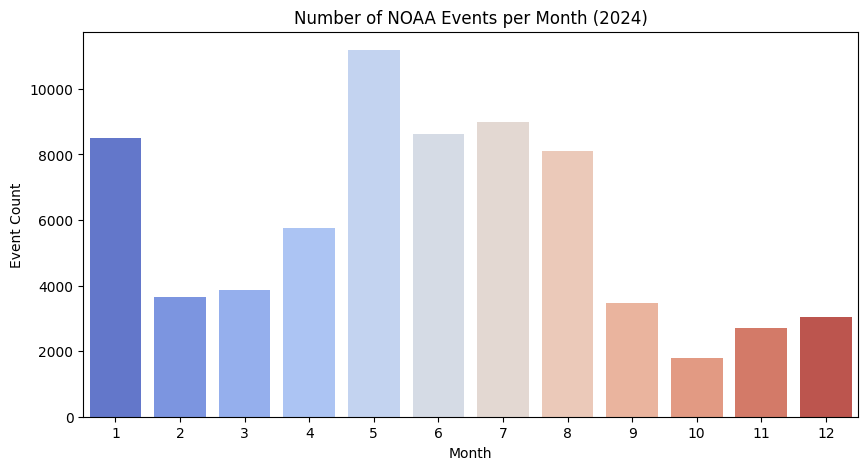

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract month from BEGIN_DATE_TIME
noaa_clean['MONTH'] = noaa_clean['BEGIN_DATE_TIME'].dt.month

plt.figure(figsize=(10,5))
sns.countplot(x='MONTH', data=noaa_clean, palette='coolwarm')
plt.title('Number of NOAA Events per Month (2024)')
plt.xlabel('Month')
plt.ylabel('Event Count')
plt.show()


In [35]:
noaa_clean.to_csv(r"..\data_clean\noaa_clean.csv", index=False)